# xlnet-tiny model trained on the noisy data

In [ ]:
# for SCC jupyter
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
# for google colab
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import pandas as pd
import os
# should test if the number of df rows matches the number of txt rows
# some data files meet the problem:  
# such as twitter-2016train-A, should be 6000 examples, but some lines are read as one line

# data_path='./data/'

# train_file='./data/training.1600000.processed.noemoticon.csv'
# test_file='./data/twitter-2016test-A.txt'

In [ ]:
root_path = '/content/gdrive/My Drive/Common Data/CS505/project/'
train_file='/content/gdrive/My Drive/Common Data/CS505/project/training.1600000.processed.noemoticon.csv'
test_file='/content/gdrive/My Drive/Common Data/CS505/project/Subtask_A/twitter-2016test-A.txt'

## 1. Import the data

### 1.1 Import the training data

In [ ]:
df_train=pd.read_csv(train_file,sep=',',names=['sentiment','id','time','no_query','user','text'])
df_train

,sentiment,id,time,no_query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


### 1.2 Import the test data

In [ ]:
import nltk
nltk.download('punkt')
df_test=None
length_threshold=150 # number of words in a sentence, try to filter out the wrong read lines

df_test=pd.read_csv(test_file,sep='\t',names=['id','sentiment','text','none'])
for idx, text in enumerate(df_test.text.values):
    tokens = nltk.word_tokenize(text)
    if len(tokens)>length_threshold:
        df_test.drop(index=[idx])
df_test=df_test[df_test.sentiment.isin(['negative','positive'])]
df_test

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,sentiment,text,none
2,619971047195045888,negative,If these runway renovations at the airport pre...,NaN
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,NaN
5,619994586182619136,positive,"Excited to read ""Go Set a Watchman"" on Tuesday...",NaN
6,619998879447162881,positive,Watching Miss USA tomorrow JUST to see @Travis...,NaN
8,620013074272137216,positive,Call for reservations for lunch or dinner tomo...,NaN
...,...,...,...,...
20617,681820700592701440,positive,"@viagogo hiya, do you know when my tickets for...",NaN
20619,681827597962096641,positive,@PurposeTourCom Selling 4 Justin bieber standi...,NaN
20620,681828714376749057,positive,@Chidwack__ omg yes!! Then I'll be in Milan fo...,NaN
20628,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless...",NaN


## 2. Preprocess the data

### 2.1 Add the sentiment label to the training data
If the sentiment is 4, then its label is 1, i.e. the positive one. Otherwise, 0.

In [ ]:
train_texts=df_train.text.values
train_sentiments=df_train.sentiment.values
train_labels=[int(x/4) for x in train_sentiments]
df_train.insert(df_train.shape[1],'label',train_labels)
df_train

,sentiment,id,time,no_query,user,text,label
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,1
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,1


### 2.2 Delete the neutral twitters from the test data. Only keep the positive and negative ones.

In [ ]:
test_texts=df_test.text.values
test_sentiments=df_test.sentiment.values
sent2labels={'negative':0,'positive':1}
test_labels=[sent2labels[x] for x in test_sentiments]
df_test.insert(df_test.shape[1],'label',test_labels)

### 2.3 Split the validation datasets with 9:1 ratio

In [ ]:
# split the train dataset to train and val with 9:1 ratio
from sklearn.model_selection import train_test_split
df_train_split,df_val_split=train_test_split(df_train[['text','label']], test_size=.1)

### 2.4 Create the dataset of the training, validation and test data

In [ ]:
from datasets import Dataset,Features,Value,ClassLabel
class_names = ["negative", "positive"]
sentiment_features = Features({'text': Value('string'), 'label': ClassLabel(names=class_names)})

train_dataset=Dataset.from_pandas(df_train_split[['text','label']],features=sentiment_features)
val_dataset=Dataset.from_pandas(df_val_split[['text','label']],features=sentiment_features)
test_dataset=Dataset.from_pandas(df_test[['text','label']],features=sentiment_features)

### 2.5 Select the model

In [ ]:
model_names=['prajjwal1/bert-tiny', 'sshleifer/tiny-xlnet-base-cased', 'distilgpt2']
model_index=1
model_name=model_names[model_index]

### 2.6 Tokenize the data

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name,force_download=True,)

def tokenize_function(examples):
    if model_name=='distilgpt2': # for gpt model
        tokenizer.pad_token = tokenizer.eos_token
    return tokenizer(examples["text"], padding='max_length', truncation=True,max_length=128)

tokenized_train_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_val_datasets = val_dataset.map(tokenize_function, batched=True)
tokenized_test_datasets = test_dataset.map(tokenize_function, batched=True)

## 3. Train the model

### 3.1 Create the model

In [ ]:
from transformers import AutoModelForSequenceClassification

# model init function for hyperparameter search
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2, return_dict=True)
# init the model for train 
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
if model_name=='distilgpt2': # for gpt model
    model.config.pad_token_id = model.config.eos_token_id

Some weights of the model checkpoint at sshleifer/tiny-xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at sshleifer/tiny-xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'sequence_summary.summary.bias', 'logits_proj.weight', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be ab

### 3.2 Create the metric generator

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

### 3.3 Configure the training parameters

In [ ]:
from transformers import TrainingArguments,Trainer


training_args = TrainingArguments(output_dir='/content/gdrive/My Drive/Common Data/CS505/project/'+ 'noisy_'+model_name+'_ckpt',
                                  learning_rate=3e-5,
                                  weight_decay=0.01,
                                  warmup_ratio=0.3,
                                  per_device_train_batch_size=512,
                                  per_device_eval_batch_size=512,
                                  num_train_epochs=5,
                                  evaluation_strategy="epoch"
                                 )
trainer = Trainer(
    model=model, # for train
    # model_init=model_init, # for hyperparas search
    args=training_args,
    train_dataset=tokenized_train_datasets,
    eval_dataset=tokenized_val_datasets,
    compute_metrics=compute_metrics,
)

### 3.4 Train

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `XLNetForSequenceClassification.forward` and have been ignored: text. If text are not expected by `XLNetForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1440000
  Num Epochs = 5
  Instantaneous batch size per device = 512
  Total train batch size (w. parallel, distributed & accumulation) = 512
  Gradient Accumulation steps = 1
  Total optimization steps = 14065


Epoch,Training Loss,Validation Loss,Accuracy
1,0.693200,0.693146,0.499088
2,0.669600,0.647362,0.725769
3,0.606000,0.576392,0.756500
4,0.557200,0.541849,0.767919
5,0.544400,0.531957,0.770969


Saving model checkpoint to /content/gdrive/My Drive/Common Data/CS505/project/noisy_sshleifer/tiny-xlnet-base-cased_ckpt/checkpoint-500
Configuration saved in /content/gdrive/My Drive/Common Data/CS505/project/noisy_sshleifer/tiny-xlnet-base-cased_ckpt/checkpoint-500/config.json
Model weights saved in /content/gdrive/My Drive/Common Data/CS505/project/noisy_sshleifer/tiny-xlnet-base-cased_ckpt/checkpoint-500/pytorch_model.bin
Saving model checkpoint to /content/gdrive/My Drive/Common Data/CS505/project/noisy_sshleifer/tiny-xlnet-base-cased_ckpt/checkpoint-1000
Configuration saved in /content/gdrive/My Drive/Common Data/CS505/project/noisy_sshleifer/tiny-xlnet-base-cased_ckpt/checkpoint-1000/config.json
Model weights saved in /content/gdrive/My Drive/Common Data/CS505/project/noisy_sshleifer/tiny-xlnet-base-cased_ckpt/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to /content/gdrive/My Drive/Common Data/CS505/project/noisy_sshleifer/tiny-xlnet-base-cased_ckpt/checkpoint-1500


TrainOutput(global_step=14065, training_loss=0.6239764013198869, metrics={'train_runtime': 2810.863, 'train_samples_per_second': 2561.491, 'train_steps_per_second': 5.004, 'total_flos': 1714176000000.0, 'train_loss': 0.6239764013198869, 'epoch': 5.0})

## 4. Test and evaluate the model

### 4.1 Calculate the loss and accuracy of the model on the test data 

In [ ]:
trainer.evaluate(tokenized_test_datasets)

The following columns in the evaluation set  don't have a corresponding argument in `XLNetForSequenceClassification.forward` and have been ignored: text. If text are not expected by `XLNetForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 10290
  Batch size = 512


{'epoch': 5.0,
 'eval_accuracy': 0.710689990281827,
 'eval_loss': 0.5850306749343872,
 'eval_runtime': 2.9586,
 'eval_samples_per_second': 3478.054,
 'eval_steps_per_second': 7.098}

### 4.2 Save the model

In [ ]:
trainer.save_model('/content/gdrive/My Drive/Common Data/CS505/project/'+'noisy_'+model_name+'_model')

Saving model checkpoint to /content/gdrive/My Drive/Common Data/CS505/project/noisy_sshleifer/tiny-xlnet-base-cased_model
Configuration saved in /content/gdrive/My Drive/Common Data/CS505/project/noisy_sshleifer/tiny-xlnet-base-cased_model/config.json
Model weights saved in /content/gdrive/My Drive/Common Data/CS505/project/noisy_sshleifer/tiny-xlnet-base-cased_model/pytorch_model.bin


### 4.3 Plot 

In [ ]:
training_loss = [0.693200, 0.669600, 0.606000, 0.557200, 0.544400]
validation_loss = [0.693146, 0.647362, 0.576392, 0.541849, 0.531957]

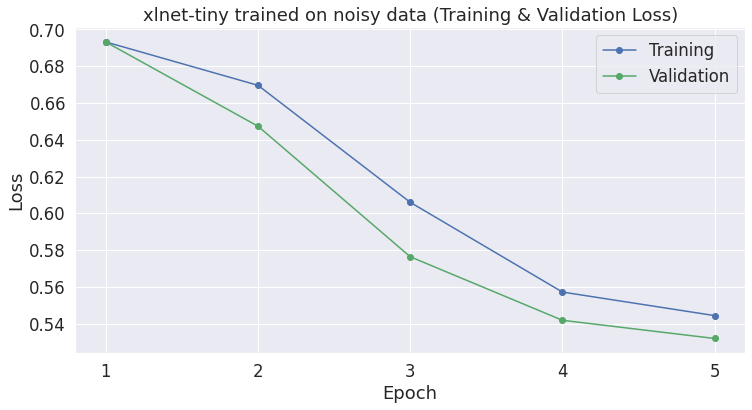

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot([1,2,3,4,5], training_loss, 'b-o', label="Training")
plt.plot([1,2,3,4,5], validation_loss, 'g-o', label="Validation")

# Label the plot.
plt.title("xlnet-tiny trained on noisy data (Training & Validation Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5])

plt.show()